In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Importing data files

merged_data_df = pd.read_csv("Resources/merged_output.csv")
merged_data_df.head()

C:\Users\Uzma\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10,13,14,15,16,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Address,CO 1st Max Hour,CO 1st Max Value,CO AQI,CO Mean,CO Units,City,County,County Code,...,SO2 1st Max Hour,SO2 1st Max Value,SO2 AQI,SO2 Mean,SO2 Units,Site Num,State,State Code,Unnamed: 0.1,Year
0,0,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3516.0,2006.0
1,1,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3517.0,2006.0
2,2,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3518.0,2006.0
3,3,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3519.0,2006.0
4,4,2956-A TREAT BOULEVARD,21.0,1.1,0.0,0.578261,Parts per million,Concord,Alameda,6001.0,...,5.0,2.0,3.0,1.000000,Parts per billion,2.0,California,6.0,3520.0,2006.0


In [3]:
# Removing decimal and zero from 'Year' column
merged_data_df['Year'] = merged_data_df['Year'].astype(str).replace('\.0', '', regex=True)
merged_data_df.head()

,Unnamed: 0,Address,CO 1st Max Hour,CO 1st Max Value,CO AQI,CO Mean,CO Units,City,County,County Code,...,SO2 1st Max Hour,SO2 1st Max Value,SO2 AQI,SO2 Mean,SO2 Units,Site Num,State,State Code,Unnamed: 0.1,Year
0,0,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3516.0,2006
1,1,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3517.0,2006
2,2,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3518.0,2006
3,3,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3519.0,2006
4,4,2956-A TREAT BOULEVARD,21.0,1.1,0.0,0.578261,Parts per million,Concord,Alameda,6001.0,...,5.0,2.0,3.0,1.000000,Parts per billion,2.0,California,6.0,3520.0,2006


In [4]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the County for each pollutants.

In [5]:
# Group by County and aggregate mean, median, variance, standard deviation, and SEM of the CO (Carbon Mono Oxide) Air Quality Index for each County.
stat_co_df = merged_data_df.groupby(['County']).agg({'CO AQI': [np.max, np.min, np.mean, np.median, np.var, np.std, st.sem]})
stat_co_df.head()

CO AQI                                                       
            amax amin      mean median         var        std       sem
County                                                                 
Alameda    126.0  0.0  4.045103    0.0   53.021177   7.281564  0.087973
Amador      22.0  0.0  3.512195    0.0   22.706098   4.765092  0.744182
Butte       50.0  0.0  4.935484    1.0   69.280357   8.323482  0.747471
Calaveras   50.0  0.0  5.880952    3.0  106.741580  10.331582  1.594198
Colusa       7.0  7.0  7.000000    7.0    0.000000   0.000000  0.000000

In [6]:
stat_co_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, Alameda to Yuba
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (CO AQI, amax)    54 non-null     float64
 1   (CO AQI, amin)    54 non-null     float64
 2   (CO AQI, mean)    54 non-null     float64
 3   (CO AQI, median)  54 non-null     float64
 4   (CO AQI, var)     54 non-null     float64
 5   (CO AQI, std)     54 non-null     float64
 6   (CO AQI, sem)     54 non-null     float64
dtypes: float64(7)
memory usage: 3.4+ KB


In [7]:
# Rename columns for mean, median, variance, standard deviation, and SEM of the CO AQI (Carbon Mono Oxide Air Quality Index) for each County.

stat_co_df.columns = ['Max_Value', 'Min_Value', 'Mean', 'Median', 'Variance', 'Standard_Deviation', 'Std_Error_of_Mean']
stat_co_df.head()

,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation,Std_Error_of_Mean
County,,,,,,,
Alameda,126.0,0.0,4.045103,0.0,53.021177,7.281564,0.087973
Amador,22.0,0.0,3.512195,0.0,22.706098,4.765092,0.744182
Butte,50.0,0.0,4.935484,1.0,69.280357,8.323482,0.747471
Calaveras,50.0,0.0,5.880952,3.0,106.741580,10.331582,1.594198
Colusa,7.0,7.0,7.000000,7.0,0.000000,0.000000,0.000000


In [9]:
# Finding which County has the max value of CO AQI summary statistics.
co_df = stat_co_df.loc[stat_co_df['Max_Value'].idxmax()]
co_df

Max_Value             201.000000
Min_Value               0.000000
Mean                    8.210711
Median                  0.000000
Variance              195.715905
Standard_Deviation     13.989850
Std_Error_of_Mean       0.114821
Name: Imperial, dtype: float64

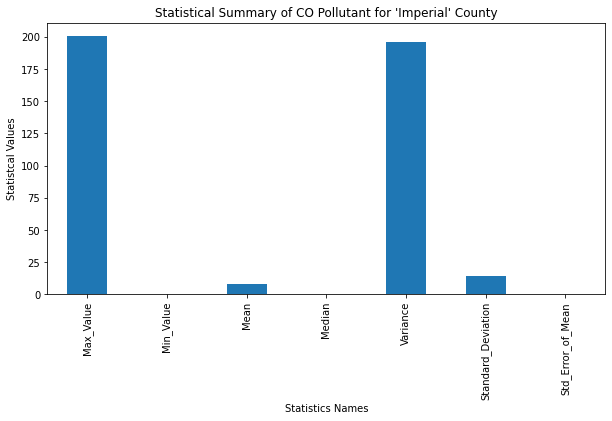

<Figure size 432x288 with 0 Axes>

In [13]:
# Use DataFrame.plot() in order to create a bar chart of the data
co_df.plot(kind="bar", figsize=(10,5))

# Give our chart some labels and a tile
plt.title("Statistical Summary of CO Pollutant for 'Imperial' County")
plt.xlabel("Statistics Names")
plt.ylabel("Statistcal Values")
plt.show()
plt.tight_layout()